In [243]:
import pandas as pd
from preprocessing import pregame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from scipy.stats import describe,ttest_ind,f_oneway


In [244]:
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv",encoding='latin1')

In [238]:
df.shape

(4990, 17)

In [128]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [245]:
pre = pregame(df)

In [246]:
pre.checks()

INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 1

In [247]:
#if there are rows which have over 70& missing values, it might be worth it to remove them instead of replacing values


total_columns = len(df.columns)
# Define the threshold for the number of missing values
threshold = 0.7 * total_columns
# Filter rows with 70% or more missing values
rows_with_many_missing_values = df[df.isnull().sum(axis=1) >= threshold]
# Display the filtered DataFrame
print(rows_with_many_missing_values)

#cleaned_df = df.dropna(thresh=threshold)


            Date Time                      Location  \
103     9/7/1925  NaN                  Toul, France   
347    8/10/1934  NaN                 Ningbo, China   
450   12/26/1936  NaN                Nanking, China   
751    11/9/1944  NaN               Seljord, Norway   
1186   7/30/1950  NaN               Algrete, Brazil   
1224   1/20/1951  NaN                  Huilyo, Peru   
1355  12/22/1952  NaN               Damascus, Syria   
1377   4/10/1953  NaN  Near Anchieta Island, Brazil   
1443   3/13/1954  NaN  Dien Bien Phu, South Vietnam   

                                 Operator Flight # Route         AC Type  \
103                                 CIDNA      NaN   NaN         Spad 33   
347   China National Aviation Corporation      NaN   NaN  Sikorsky S-38B   
450   China National Aviation Corporation      NaN   NaN    Douglas DC-2   
751        Military - U.S. Army Air Corps      NaN   NaN             NaN   
1186     SAVG (S.A. Viacao Gaucha, ) SAVG      NaN   NaN             

In [248]:
print(len(rows_with_many_missing_values))
print(rows_with_many_missing_values["Fatalities"])
df.dropna(subset=['Fatalities'], axis=0, inplace=True)

9
103      NaN
347      NaN
450      NaN
751      NaN
1186    10.0
1224    16.0
1355     9.0
1377    26.0
1443     NaN
Name: Fatalities, dtype: float64


In [249]:
fill_unknown = ["Location", "Route","AC Type","Registration", "Summary", "Operator"]
fill_null = ["cn/ln", "Flight #"]
fill_mean = []
fill_mode = ["Aboard Passangers", "Fatalities Passangers", "Ground"]
fill_median = ["Aboard", "Aboard Crew", "Fatalities Crew"]
dont_know = ["Fatalities", "Time"]

In [250]:
# Iterate over fill_unknown and call foreplay for each column
for column in fill_unknown:
    pre.foreplay(column, fill_strategy="Unknown")

# Iterate over fill_null and call foreplay for each column
for column in fill_null:
    pre.foreplay(column, fill_strategy="0")

# Iterate over fill_mode and call foreplay for each column
for column in fill_mode:
    pre.foreplay(column, fill_strategy="mode")

# Iterate over fill_median and call foreplay for each column
for column in fill_median:
    pre.foreplay(column, fill_strategy="median")



In [251]:
pre.df.isnull().sum()

Date                        0
Time                     1504
Location                    0
Operator                    0
Flight #                    0
Route                       0
AC Type                     0
Registration                0
cn/ln                       0
Aboard                      0
Aboard Passangers           0
Aboard Crew                 0
Fatalities                  0
Fatalities Passangers       0
Fatalities Crew             0
Ground                      0
Summary                     0
dtype: int64

In [252]:
#df.drop("Flight #", axis = 1, inplace = True)

In [253]:
df["Time"].value_counts()

Time
15:00    38
17:00    33
14:00    32
12:00    32
11:00    32
         ..
17:11     1
11:08     1
12:59     1
20:39     1
15:11     1
Name: count, Length: 1060, dtype: int64

In [254]:
df = pre.df

In [255]:
to_int_cols = ["Aboard Passangers", "Aboard Crew", "Fatalities Passangers", "Fatalities Crew","Aboard"]
for col in to_int_cols:
  df[col] = df[col].astype(int)


#df["Time"] = pd.to_datetime(df["Time"]).dt.time #can only convert once no missing values left
df["Date"] = pd.to_datetime(df["Date"])

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4990 non-null   datetime64[ns]
 1   Time                   3486 non-null   object        
 2   Location               4990 non-null   object        
 3   Operator               4990 non-null   object        
 4   Flight #               4990 non-null   object        
 5   Route                  4990 non-null   object        
 6   AC Type                4990 non-null   object        
 7   Registration           4990 non-null   object        
 8   cn/ln                  4990 non-null   object        
 9   Aboard                 4990 non-null   int64         
 10  Aboard Passangers      4990 non-null   int64         
 11  Aboard Crew            4990 non-null   int64         
 12  Fatalities             4990 non-null   float64       
 13  Fataliti

# Exploratory Data Analysis




Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

In [143]:
num_crashes = df["Date"].count()
print("number of crashes: ", num_crashes)

number of crashes:  4990


In [144]:
num_fatal = df['Fatalities'].sum()
print("approximate number of total fatalities: ", num_fatal)

approximate number of total fatalities:  111644.0


In [145]:
# aboard = 100%
# fatalities = x%
# X = fatalities*100/aboard

survival_rate = (df.Fatalities.sum()*100)/(df.Aboard.sum())
print(f"surval ratvie based on total aboard and total fatalities: {round(survival_rate)}%")

surval ratvie based on total aboard and total fatalities: 72%


In [146]:
#Analyze the frequency of crashes over time to identify any trends.
num_crash = df.groupby(df["Date"].dt.year)["Date"].count().reset_index(name = "num crashes")
num_crash

,Date,num crashes
0,1908,1
1,1909,1
2,1912,1
3,1913,3
4,1915,2
...,...,...
108,2019,13
109,2020,8
110,2021,9
111,2022,6


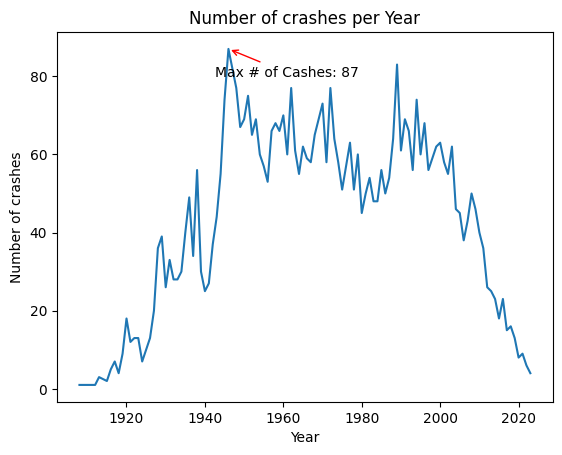

In [147]:
sns.lineplot(x="Date", y="num crashes", data = num_crash)
plt.title("Number of crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of crashes")

max_crashes_row = num_crash.loc[num_crash['num crashes'].idxmax()]
max_year = max_crashes_row['Date']
max_crashes = max_crashes_row['num crashes']

plt.annotate(f'Max # of Cashes: {max_crashes}', xy=(max_year, max_crashes), xytext=(-10, -20),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

In [148]:
#Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation

describe(df["Fatalities"])

DescribeResult(nobs=4990, minmax=(0.0, 583.0), mean=22.37354709418838, variance=1229.325658091087, skewness=4.606031652398515, kurtosis=36.59735922231812)

#hypothesis test

h0: there is not one operator that shows a significant difference in number of fatalities

h1: there is one operator that shows a significant difference in the number of fatalities

In [150]:
df_ops = df.groupby('Operator')['Fatalities'].sum().reset_index(name='count_fatalities').sort_values(by='count_fatalities', ascending = False)
df_ops.head()

,Operator,count_fatalities
92,Aeroflot,8858.0
1402,Military - U.S. Air Force,3356.0
200,Air France,1757.0
363,American Airlines,1422.0
1595,Pan American World Airways,1303.0


In [165]:

fatalities_counts = [group["Fatalities"].tolist() for name, group in df.groupby("Operator")]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*fatalities_counts)

# Set significance level
alpha = 0.05

# Print the result
if p_value < alpha:
    print("Reject null hypothesis: There is one operator that shows a significant difference in the number of fatalities.")
else:
    print("Fail to reject null hypothesis: There is not one operator that shows a significant difference in the number of fatalities.")

Reject null hypothesis: There is one operator that shows a significant difference in the number of fatalities.


In [168]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')

In [173]:
df_loc = df.groupby("Location")["Date"].count().reset_index(name="count")
df_loc.value_counts()

Location                          count
\tBatagay, Russia                 1        1
Near Sokotu, Nigeria              1        1
Near Taisha, Ecuador              1        1
Near Takoradi, Ghana              1        1
Near Tal Afar, Iraq               1        1
                                          ..
Lubango, Huila, Angola            1        1
Lubock, Texas                     1        1
Lucapa, Angola                    1        1
Lugansk, Ukraine                  1        1
near Craigavad, Northern Ireland  1        1
Name: count, Length: 4117, dtype: int64

In [175]:
top_crash_locations = df_loc[df_loc["count"] > 10]
print(top_crash_locations)

                    Location  count
343         Bogota, Colombia     12
431             Cairo, Egypt     13
548        Chicago, Illinois     11
1441     Manila, Philippines     15
1583          Moscow, Russia     17
2403     Near Moscow, Russia     11
2885      New York, New York     14
3531  Rio de Janeiro, Brazil     12
3658       Sao Paulo, Brazil     13


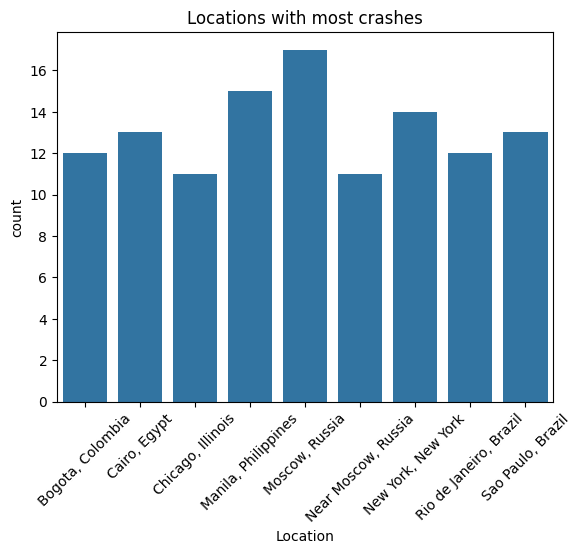

In [178]:
sns.barplot(x='Location', y='count', data= top_crash_locations)
plt.xticks(rotation = 45)
plt.title("Locations with most crashes")
plt.show()

In [181]:
top_operators = df_ops.sort_values(by="count_fatalities", ascending=False).head(10)
top_operators

,Operator,count_fatalities
92,Aeroflot,8858.0
1402,Military - U.S. Air Force,3356.0
200,Air France,1757.0
363,American Airlines,1422.0
1595,Pan American World Airways,1303.0
1412,Military - U.S. Army Air Forces,1070.0
2147,United Air Lines,1019.0
31,AVIANCA,941.0
2110,Turkish Airlines (THY),890.0
977,Indian Airlines,860.0


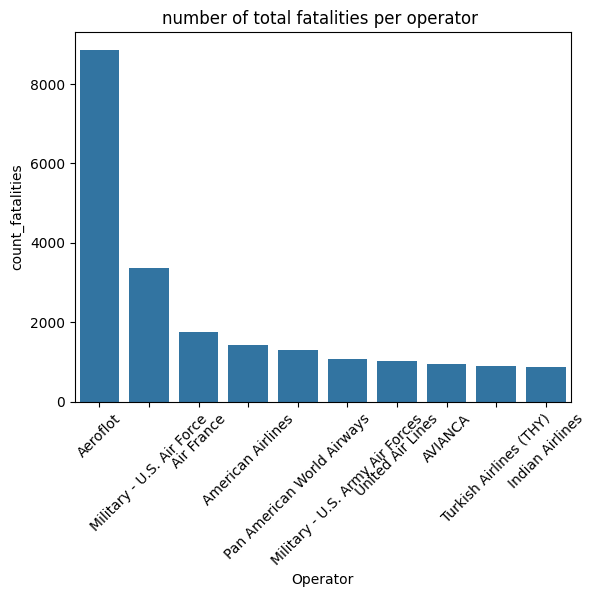

In [182]:
sns.barplot(x='Operator', y='count_fatalities', data = top_operators)
plt.xticks(rotation= 45)
plt.title("number of total fatalities per operator ")
plt.show()

In [185]:
df_ac = df.groupby("AC Type")["Fatalities"].sum().reset_index(name="count").sort_values(by="count", ascending = False).nlargest(10, "count")
df_ac

,AC Type,count
1134,Douglas DC-3,4734.0
1037,Douglas C-47,1058.0
1203,Douglas DC-6B,1051.0
164,Antonov AN-26,1038.0
1551,Ilyushin IL-18B,1008.0
1888,McDonnell Douglas DC-9-32,953.0
1186,Douglas DC-4,891.0
2398,de Havilland Canada DHC-6 Twin Otter 300,832.0
2226,Tupolev TU-134A,807.0
1852,McDonnell Douglas DC-10-10,804.0


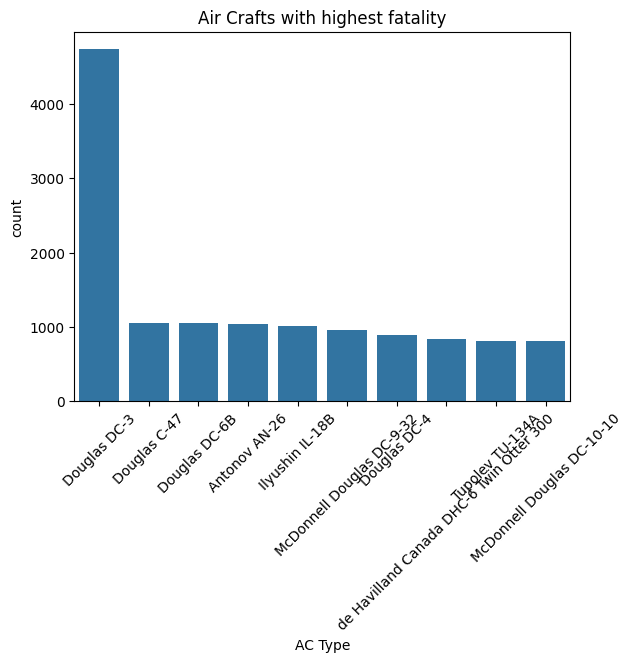

In [186]:
sns.barplot(x="AC Type", y = "count", data=df_ac)
plt.xticks(rotation = 45)
plt.title("Air Crafts with highest fatality")
plt.show()

In [197]:
df["AC Type"].value_counts()

AC Type
Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     82
Douglas C-47A                                70
Douglas C-47                                 63
Douglas DC-4                                 38
                                           ... 
VEB 14P                                       1
Convair CV-340-59                             1
Vickers Viscount 759D                         1
H-21B                                         1
\tLearjet 35A                                 1
Name: count, Length: 2461, dtype: int64

In [235]:
worst_case = df[(df["AC Type"] == "Douglas DC-3") & (df["Operator"] == "Aeroflot")]
worst_case

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary


In [257]:
df_ac_type= df.groupby(["AC Type", "Operator"])["Date"].count().reset_index(name="count").sort_values(by="count", ascending = False).nlargest(50, "count")
df_ac_type

,AC Type,Operator,count
1441,De Havilland DH-4,US Aerial Mail Service,25
3965,Yakovlev YAK-40,Aeroflot,18
2804,Junkers JU-52/3m,Deutsche Lufthansa,15
1512,Douglas C-47,China National Aviation Corporation,14
2700,Ilyushin IL-12,Aeroflot,13
216,Antonov AN-24,Aeroflot,12
2708,Ilyushin IL-14P,Aeroflot,11
1941,Douglas DC-3,Philippine Air Lines,10
3787,Tupolev TU-104B,Aeroflot,10
1673,Douglas C-47B,Military - Royal Air Force,9


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


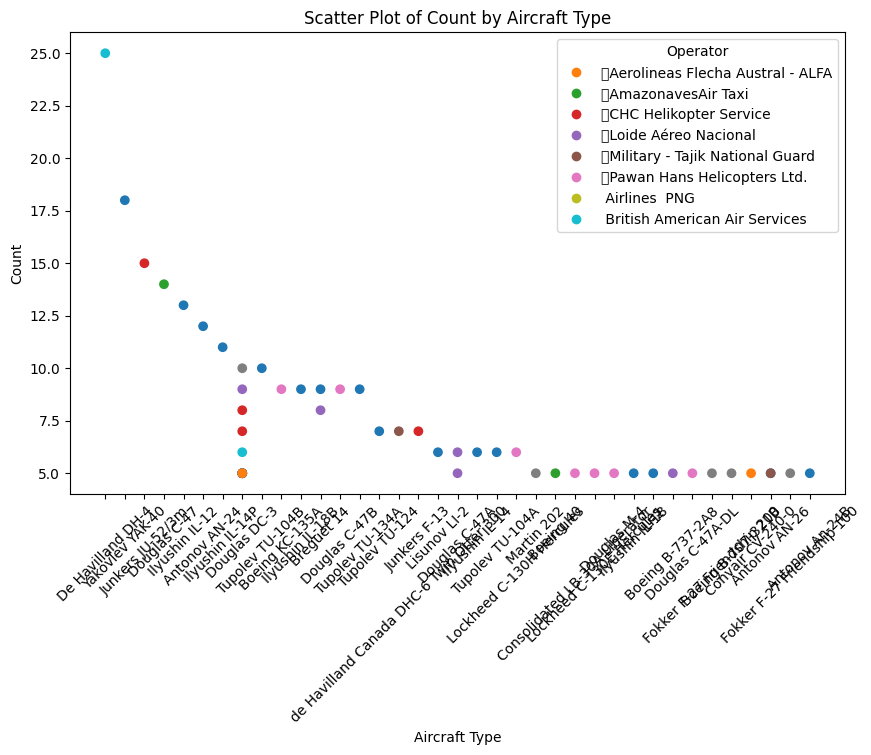

In [228]:
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Operator' column to categorical data type
df_ac_type['Operator'] = df_ac_type['Operator'].astype('category')

# Map each category to a unique numerical value
operator_mapping = {operator: i for i, operator in enumerate(df_ac_type['Operator'].cat.categories)}

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_ac_type['AC Type'], df_ac_type['count'], c=df_ac_type['Operator'].map(operator_mapping), cmap='tab10')
plt.xticks(rotation=45)

# Add legend
legend_labels = list(operator_mapping.keys())
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Operator')

# Add labels and title
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.title('Scatter Plot of Count by Aircraft Type')

# Show plot
plt.show()


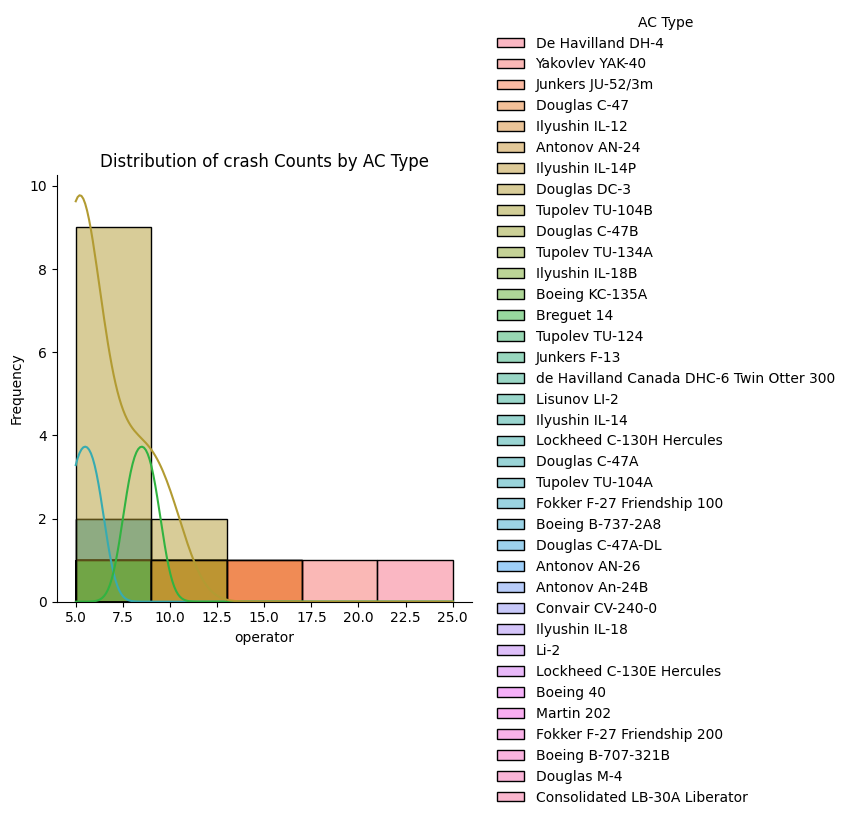

In [262]:

# Create a distribution plot
sns.displot(data=df_ac_type, x="count", hue="AC Type", kind="hist", bins=5, kde=True)

# Set plot title and labels
plt.title("Distribution of crash Counts by AC Type")
plt.xlabel("operator")
plt.ylabel("Frequency")

# Show plot
plt.show()


In [233]:
# Group by Operator and month, then aggregate the count of Fatalities
fatalities_per_month_per_operator = df.groupby(['Operator', df['Date'].dt.month])['Date'].count().reset_index(name="count")

# Rename the columns for clarity
fatalities_per_month_per_operator.columns = ['Operator', 'Month', 'crash_count']

# Display the result
print(fatalities_per_month_per_operator)


                                 Operator  Month  crash_count
0      \tAerolineas Flecha Austral - ALFA      1            0
1      \tAerolineas Flecha Austral - ALFA      2            0
2      \tAerolineas Flecha Austral - ALFA      3            0
3      \tAerolineas Flecha Austral - ALFA      4            0
4      \tAerolineas Flecha Austral - ALFA      5            1
...                                   ...    ...          ...
27175                  Ã¨koda (India) Ltd      8            0
27176                  Ã¨koda (India) Ltd      9            1
27177                  Ã¨koda (India) Ltd     10            0
27178                  Ã¨koda (India) Ltd     11            0
27179                  Ã¨koda (India) Ltd     12            0

[27180 rows x 3 columns]


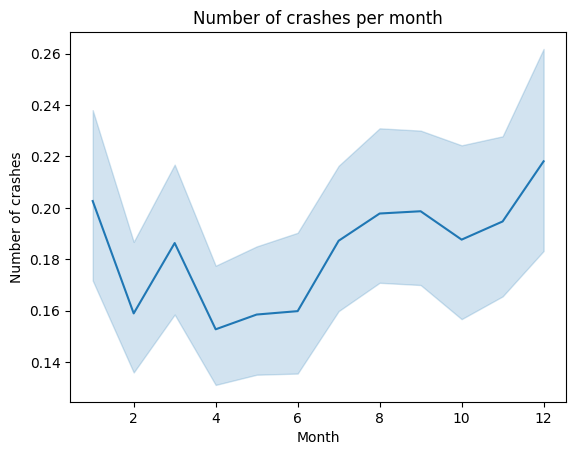

In [234]:
sns.lineplot(x="Month", y="crash_count", data = fatalities_per_month_per_operator)
plt.title("Number of crashes per month")
plt.xlabel("Month")
plt.ylabel("Number of crashes")

plt.show()

Conclusions:
- Avoid flying with aeroflot
- Avoid flying with Aircraft type Douglas DC-3
- Avoid flying over and near Russia
- statistical anova test shows that there is a significant difference in number of crashes between the operators
- 1950s was a bad time for flying. good time for crashing.
- since the 90s the number of crashes has been falling
- the 20s are a good time to fly. both 1920s and 2020s
- flying around end of the year, October to December, seems to be a higher risk. Best to fly April to June.
